# 0. Import Library

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats

![](https://onlinelibrary.wiley.com/cms/asset/ea1d3bd8-afd7-4914-b645-74d424b6690d/advs3654-fig-0002-m.jpg)

# 1. Input Data

In [2]:
#อ่านไฟล์ Iris.csv
df = pd.read_csv('Iris.csv')

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis (EDA)

In [ ]:
#สำรวจข้อมูลเบื้องต้น (มี Code ให้แล้ว)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## 2.2 Data Cleaning

In [ ]:
#ไม่ต้องทำ (มี Code ให้แล้ว)

### - Missing Value

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### - Inconsistent Data

### - Outliers

## 2.3 Data Transformation

In [8]:
#ไม่ต้องทำ Data Transformation
from sklearn.preprocessing import LabelEncoder
def labelEncode(data, columns):
    columns_ = []
    for i in columns:
        lb = LabelEncoder()
        lb_ = lb.fit_transform(data[i].astype(str))
        data[i+'_Encoded']=lb_
        columns_.append(i+'_Encoded')
    return columns_,lb

columns = ['Species']
enc_columns, lb=labelEncode(df, columns)

for i in enc_columns:
    print(i[:-8])
    print(' ',df[i[:-8]].unique())
    print(' ',df[i].unique())
    print('  -------')

Species
  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
  [0 1 2]
  -------


## [Optional] Export เป็นไฟล์เมื่อทำ Data Cleaning เสร็จแล้ว

In [ ]:
#ไม่ต้อง Export
#df.to_csv('รหัสนักศึกษา.csv',index=False)

## 2.4 ตรวจสอบค่าสหสัมพันธ์ของตัวแปร x, y

In [ ]:
#ดูค่าสหสัมพันธ์ของข้อมูล (มี Code ให้แล้ว)

In [9]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encoded
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_Encoded,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


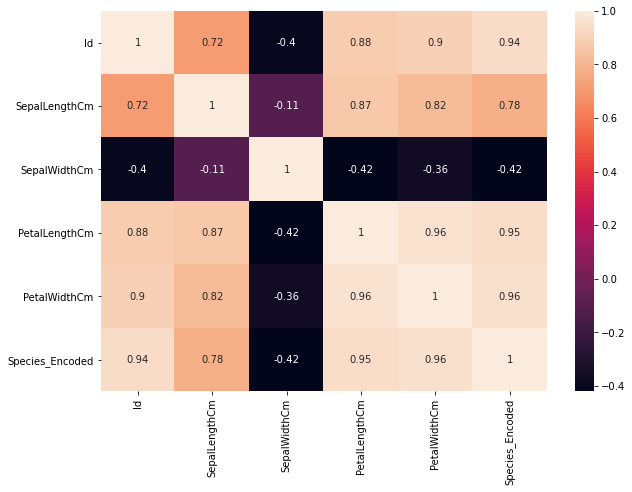

In [10]:
plt.rcParams['figure.figsize'] = 10,7 
sns.heatmap(df.corr(), annot=True);

## 2.5 การกำหนด Feature

In [12]:
#กำหนดตัวแปรที่เป็นข้อมูล feature (X)
X=df.iloc[:, [3,4]].values


KMeans(max_iter=200, n_clusters=5)

# 3. Modelling

In [ ]:
#ทำการเปรียบเทียบระหว่าง k-Means และ AGNES โดยแบ่งเป็น 3 กลุ่ม
#- Clustering Data
#1. เทรนข้อมูลและสร้างโมเดล
#2. กรณีของ AGNES ให้พล็อตกราฟ Dendrogram ด้วย
#- Predict Data
#1. ทำการแบ่งกลุ่มโดยใช้ fit_predict()
#2. สร้าง Column ใน DataFrame เพื่อเก็บผลลัพธ์ในการแบ่งกลุ่ม
#3. พล็อตกราฟความสัมพันธ์ระหว่าง Feature ใดก็ได้ 2 Features
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch


model.fit(X)

## 3.1 Clustering Data

## - k-Means

In [ ]:
model0 = KMeans(n_clusters=5, max_iter=200)
model0.fit(X)

## - AGNES

In [ ]:
model1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model1.fit(X)

## 3.2 Predict Data

## - k-Means

## - AGNES

# 4. Model Evaluation

In [ ]:
#ประเมินประสิทธิภาพของโมเดลเปรียบเทียบระหว่าง k-Means และ AGNES
# 1. Silhouette Score
# 2. Davies-Bouldin Index

## 4.1 Silhouette Score 

## 4.2 Davies-Bouldin Index

# [Optional] Save Machine Learning Models

In [ ]:
#ไม่ต้อง Save